<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date:</small><br/>
    <small>Section:</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

<img src="Images/Lab3_pt2_1_1.png" width="500">
<br/><img src="Images/Lab3_pt2_1_2.png" width="500">

**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

In [7]:
def s1_Ak(k):
    return 2/(k*np.pi)

def s2_Ak(k):
    return (2/(np.pi*k))*np.sin(np.pi*k/2)

K = np.linspace(1,200,200)

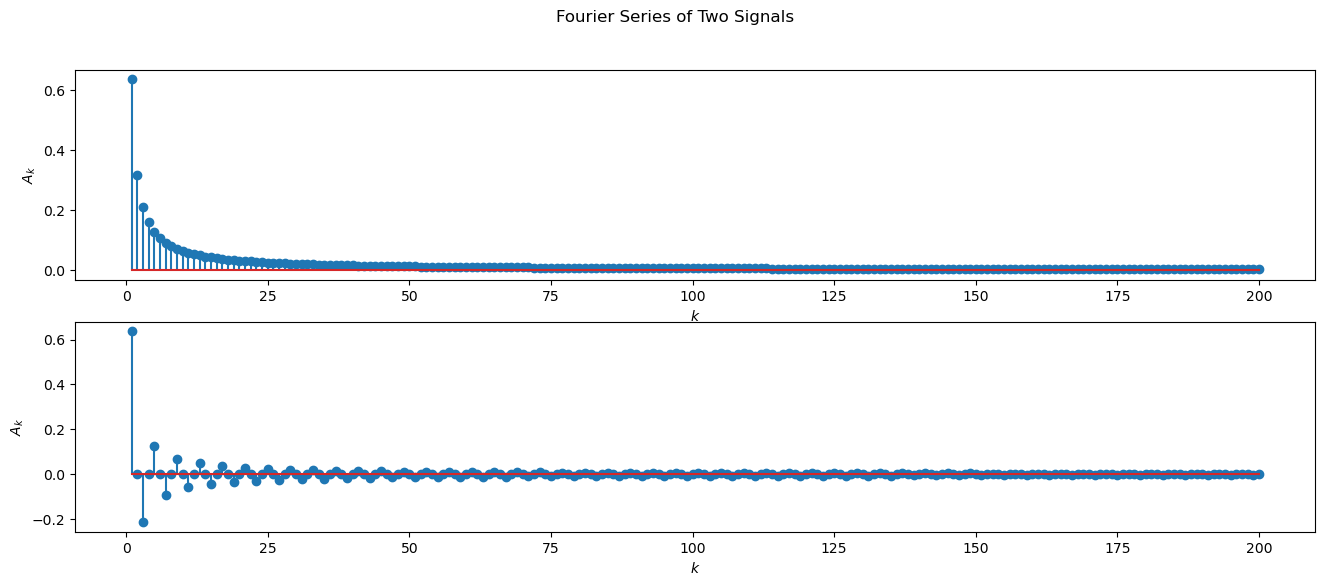

In [8]:
A_1 = [s1_Ak(k) for k in K] 
A_2 = [s2_Ak(k) for k in K]

plt.suptitle("Fourier Series of Two Signals")

plt.subplot(2,1,1)
plt.stem(K,A_1)
plt.xlabel("$k$")
plt.ylabel("$A_k$")

plt.subplot(2,1,2)
plt.stem(K,A_2)
plt.xlabel("$k$")
plt.ylabel("$A_k$")
plt.show()

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

1) <br/><img src="Images/lab3_pt4_1_1.png" width="500"><br/>
2) <br/><img src="Images/lab3_pt4_1_1b.png" width="500"><br/>
3) <br/><img src="Images/lab3_pt4_1_1c.png" width="500"><br/>

**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

insert your answer here

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

1) <br/><img src="Images/lab3_pt4_2_1a.png" width="500"><br/>
2) <br/><img src="Images/lab3_pt4_2_1b.png" width="500"><br/>
3) <br/><img src="Images/lab3_pt4_2_1c.png" width="500"><br/>
4) <br/><img src="Images/lab3_pt4_2_1d.png" width="500"><br/>

**2. What effect does changing the modulating frequency have on the spectral density?**

Changing the modulating frequency shifts the peak of the spectral density to the right.

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

write your answer here

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

As the period increases toward infinity, the spectral density would become greater and greater until, in the limit, the spectral distribution becomes a continuous curve.

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

<br/><img src="Images/lab3_pt4_3_1.png" width="700"><br/>

**2. Hand in the plot of the impulse response obtained using a unit step.**

<br/><img src="Images/lab3_pt4_3_2.png" width="500"><br/>

**3. What are the advantages and disadvantages of each method?**

write your answer here

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [9]:
def DTFT(x,n0,w):
    N = len(x)
    Xw = np.zeros(N).astype(complex)
    for v in range(len(w)):
        for n in range(N):
            Xw[v] += x[n]*np.exp(-1j*w[v]*(n+n0))
    return Xw

**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

In [10]:
def delta(n):
    return [1 if i==0 else 0 for i in n]

def ustep(n):
    return [1 if i>=0 else 0 for i in n]

In [11]:
n = np.linspace(-10,10,21)
w = np.linspace(-np.pi,np.pi,21)

x1 = delta(n)
x2 = delta(n-5)
x3 = np.power(0.5,n)*ustep(n)

Xw1 = DTFT(x1,n[0],w)
Xw2 = DTFT(x2,(n-5)[0],w)
Xw3 = DTFT(x3,n[0],w)

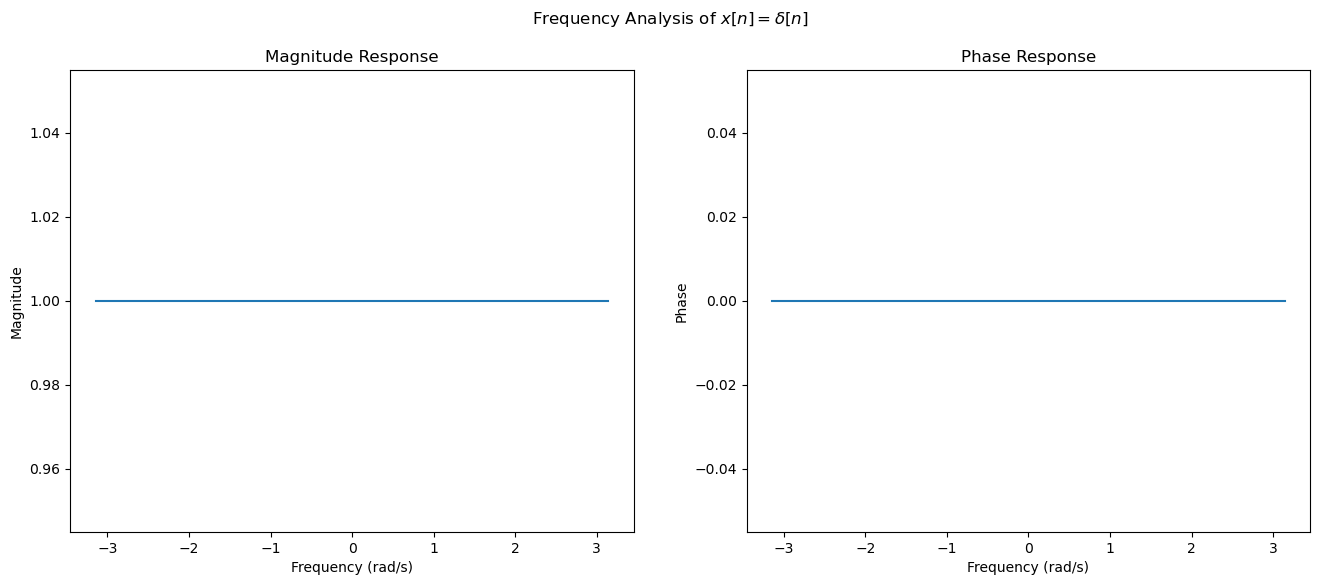

In [12]:
plt.suptitle(r"Frequency Analysis of $x[n]=\delta[n]$")

plt.subplot(1,2,1)
plt.plot(w,np.abs(Xw1))
plt.title("Magnitude Response")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(w,np.angle(Xw1))
plt.title("Phase Response")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase")

plt.show()

Text(0, 0.5, 'Phase')

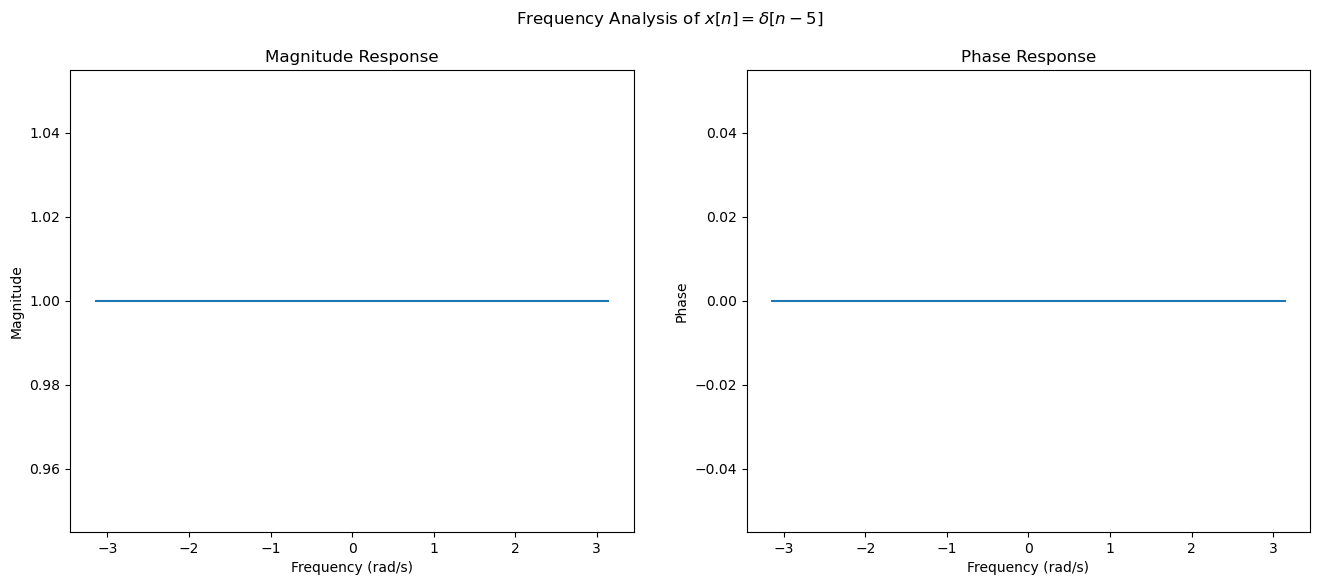

In [13]:
plt.suptitle("Frequency Analysis of $x[n]=\delta[n-5]$")

plt.subplot(1,2,1)
plt.plot(w,np.abs(Xw2))
plt.title("Magnitude Response")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(w,np.angle(Xw2))
plt.title("Phase Response")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase")

Text(0, 0.5, 'Phase')

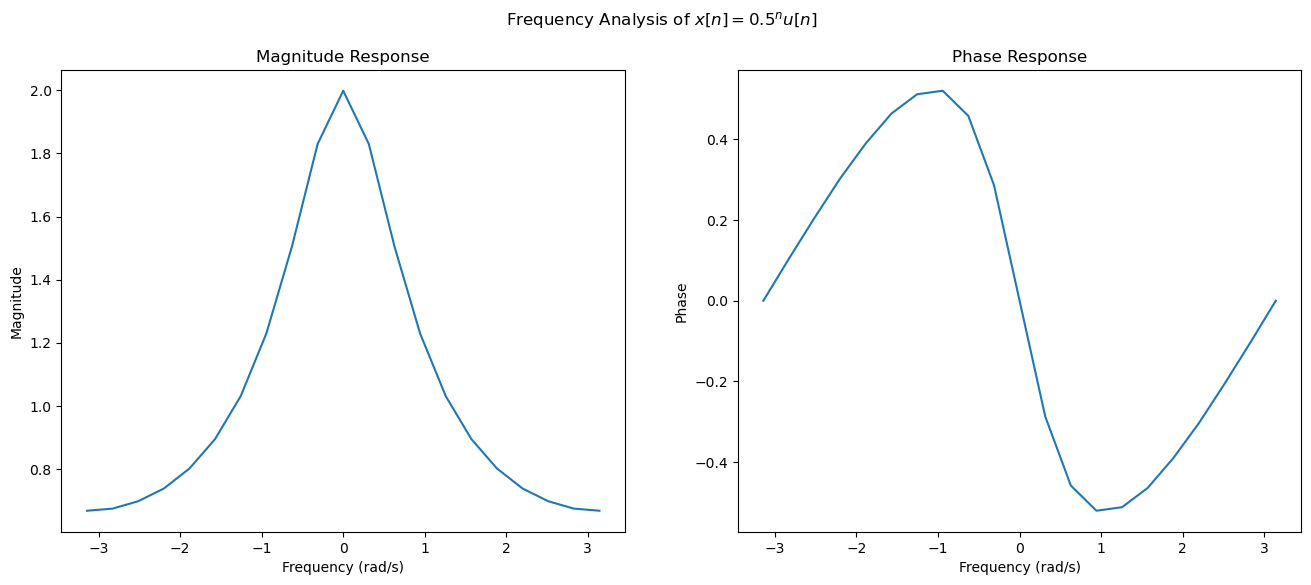

In [14]:
plt.suptitle("Frequency Analysis of $x[n]=0.5^{n}u[n]$")

plt.subplot(1,2,1)
plt.plot(w,np.abs(Xw3))
plt.title("Magnitude Response")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(w,np.angle(Xw3))
plt.title("Phase Response")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase")

<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

<img src="Images/lab3_pt5_2_1.png" width="500">

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

$h[n]=0.9h[n-1]+0.3\delta[n]+0.24\delta[n-1]$<br/>
At $n=-1$, $h[n]=0.9(0)+0.3(0)+0.24(0)=0$.<br/>
At $n=0$, $h[n]=0.9(0)+0.3(1)+0.24(0)=0.3$.<br/>
At $n=1$, $h[n]=0.9(0.3)+0.3(0)+0.24(1)=1.14$.<br/>
At $n=2$, $h[n]=0.9(1.14)+0.3(0)+0.24(0)=1.026$.<br/>
At $n=3$, $h[n]=0.9(0)+0.3(0)+0.24(0)=0.9234$.<br/>
And so on.

**3. Use your answer in Q2 to obtain the frequency response of the system.**

write your answer here

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

$y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]$<br/>
$y[n]-0.9y[n-1]=0.3x[n]+0.24x[n-1]$<br/>
$Y(j\omega)-0.9e^{j\omega}Y(j\omega)=0.3X(j\omega)+0.24e^{j\omega}X(j\omega)$<br/>
$Y(j\omega)(1-0.9e^{j\omega}=X(j\omega)(0.3+0.24e^{j\omega})$<br/>
$H(j\omega)=\frac{Y(j\omega)}{X(j\omega)}=\frac{0.3+0.24e^{j\omega}}{1-0.9e^{j\omega}}$<br/>
$h(t)=\frac{0.3}{0.9}e^{j\frac{1}{0.9}t}+\frac{0.24}{0.9}e^{j\frac{1}{0.9}(t-1)}$<br/>

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

In [15]:
def h(t):
    return (0.3/0.9)*np.exp(1j*(1/0.9)*t) + (0.24/0.9)*np.exp(1j*(1/0.9)*(t-1))


In [16]:
n = np.linspace(-10,10,21)
w = np.linspace(-np.pi,np.pi,21)

h1 = h(n)

Hw1 = DTFT(h1,n[0],w)

Text(0, 0.5, 'Phase')

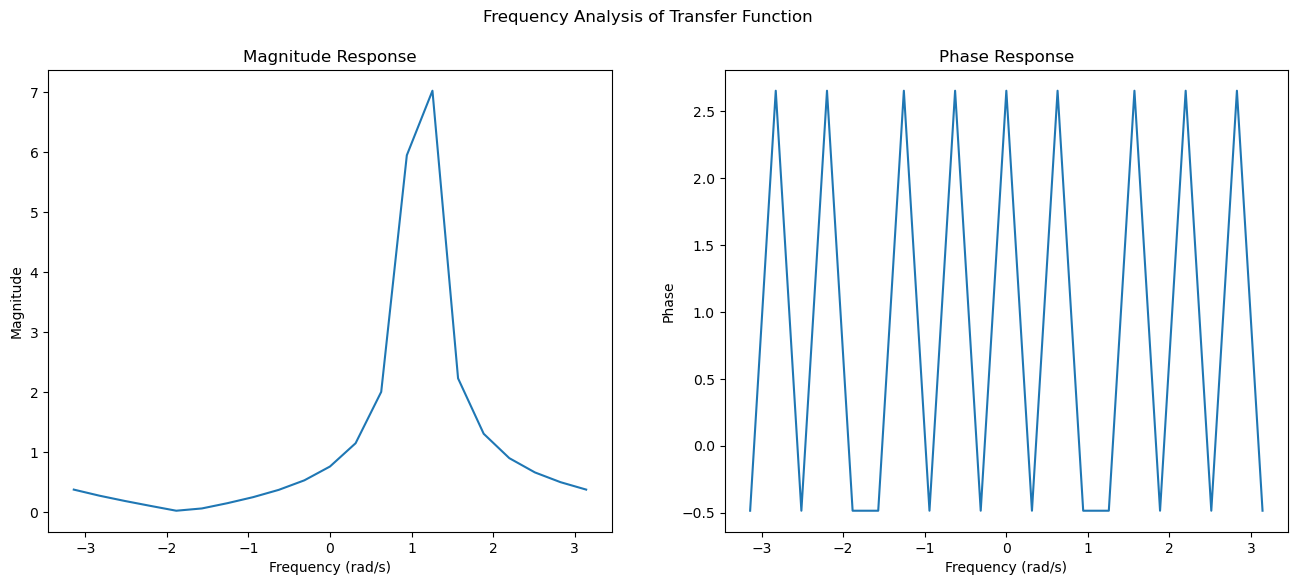

In [17]:
plt.suptitle("Frequency Analysis of Transfer Function")

plt.subplot(1,2,1)
plt.plot(w,np.abs(Hw1))
plt.title("Magnitude Response")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(w,np.angle(Hw1))
plt.title("Phase Response")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase")

<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

<img src="Images/lab3_pt5_3_1.png" width="500"><br/>

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |    1.436     |                    |
|  $\pi/8$ |    1.417     |                    |
|  $\pi/4$ |    1.351     |                    |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

In [7]:
# write your code here
